# PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


In [1]:
from google.colab import files
upload=files.upload()

Saving forestfires.csv to forestfires.csv


In [2]:
import pandas as pd
df=pd.read_csv("forestfires.csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

df["month"]=LE.fit_transform(df["month"])
df["day"]=LE.fit_transform(df["day"])
df["size_category"]=LE.fit_transform(df["size_category"])
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
df.corr()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
month,1.000000,-0.150982,-0.007636,-0.173152,0.219439,-0.172087,-0.073802,-0.102057,-0.141131,-0.076800,...,-0.126642,-0.025078,-0.044577,0.010204,0.097065,0.031976,0.032664,0.167825,0.847124,-0.032559
day,-0.150982,1.000000,0.074914,0.070218,0.058737,0.117738,0.148672,-0.103389,-0.034504,0.052881,...,-0.061222,-0.007678,0.030960,-0.008618,-0.084825,-0.056282,0.051802,-0.000325,-0.104068,-0.003550
FFMC,-0.007636,0.074914,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,...,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609,-0.022063
DMC,-0.173152,0.070218,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,...,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907,-0.034715
DC,0.219439,0.058737,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,...,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857,-0.019428
ISI,-0.172087,0.117738,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,...,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877,0.008726
temp,-0.073802,0.148672,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,...,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006,-0.006021
RH,-0.102057,-0.103389,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,...,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596,0.045243
wind,-0.141131,-0.034504,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,...,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476,-0.059113
rain,-0.076800,0.052881,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,...,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733,-0.050001


In [6]:
X=df.iloc[:,0:30]
Y=df["size_category"]

In [7]:
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
X=SS.fit_transform(X)
X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.284222,-1.423121,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
1,0.970871,1.176715,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
2,0.970871,-0.383187,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
3,0.284222,-1.423121,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
4,0.284222,0.136781,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.089076,0.136781,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
513,-1.089076,0.136781,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
514,-1.089076,0.136781,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
515,-1.089076,-0.383187,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42)

In [11]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_dim=X_train.shape[1],activation='relu',kernel_initializer="uniform"),
    tf.keras.layers.Dense(32, activation="linear",kernel_initializer="uniform",),
    tf.keras.layers.Dense(1)
])

In [12]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [13]:
history=model.fit(X_train, Y_train, epochs=150, batch_size=10, validation_split=0.3)

Epoch 1/150
27/27 [==============================] - 1s 12ms/step - loss: 1.3695 - accuracy: 0.2852 - val_loss: 0.6867 - val_accuracy: 0.4701
Epoch 2/150
27/27 [==============================] - 0s 3ms/step - loss: 0.7148 - accuracy: 0.7222 - val_loss: 0.5158 - val_accuracy: 0.8034
Epoch 3/150
27/27 [==============================] - 0s 4ms/step - loss: 0.5638 - accuracy: 0.7667 - val_loss: 0.4937 - val_accuracy: 0.8034
Epoch 4/150
27/27 [==============================] - 0s 3ms/step - loss: 0.5155 - accuracy: 0.7741 - val_loss: 0.5794 - val_accuracy: 0.8034
Epoch 5/150
27/27 [==============================] - 0s 4ms/step - loss: 0.4856 - accuracy: 0.7815 - val_loss: 0.5714 - val_accuracy: 0.8034
Epoch 6/150
27/27 [==============================] - 0s 3ms/step - loss: 0.4620 - accuracy: 0.7815 - val_loss: 0.6536 - val_accuracy: 0.8034
Epoch 7/150
27/27 [==============================] - 0s 4ms/step - loss: 0.4343 - accuracy: 0.7889 - val_loss: 0.5532 - val_accuracy: 0.8205
Epoch 8/150


In [14]:
loss=model.fit(X_train,Y_train)
loss

13/13 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.9483


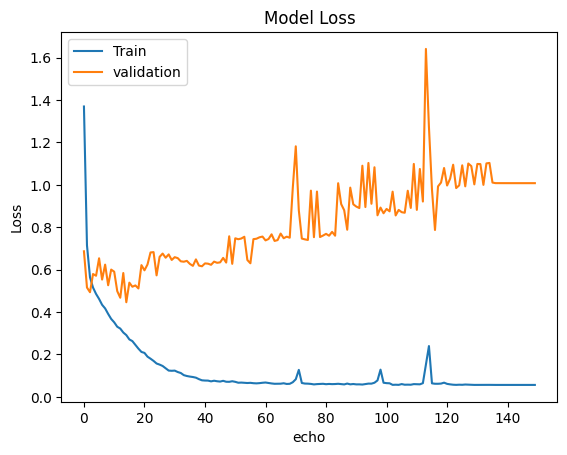

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("echo")
plt.ylabel("Loss")
plt.legend(["Train","validation"],loc="upper left")
plt.show()

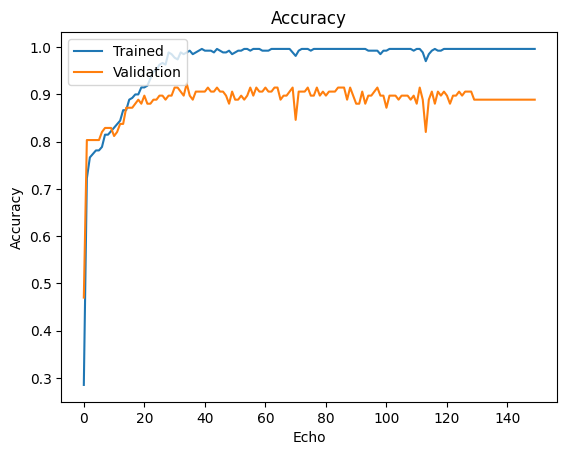

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy")
plt.xlabel("Echo")
plt.ylabel("Accuracy")
plt.legend(["Trained","Validation"],loc="upper left")
plt.show()